In [1]:
from stoch_funcs import *
import numpy as np
import scipy.stats as st
import scipy.integrate as ig
import scipy.interpolate as ip
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sb
import pandas as pd
from scipy.optimize import least_squares
import copy

In [2]:
# Set all parameters
Nt = 1e6
mu = [0,0,0,1/(22*365)]
sigma = 1/8
gamma = 1/5
beta = np.array([[1,2,2,4], [2,4,4,4],[4,4,4,4],[4,4,4,4]]).T
delta = np.array([0,1/(10*365),1/(8*365),1/(42*365)])
# Set initial conditions based on age distribution estimates
S0 = np.array([2.017e+04, 3.198e+03, 7.6e+02, 4.0e+01])
I0 = np.array([1.4e+02, 2.2e+01, 5e+00, 55e+00])
R0 = np.array([1.015e+05, 9.391e+04, 5.117e+05, 2.685e+05])
N0 = np.array([2.01850675e+04, 3.20685453e+03, 7.58724584e+02, 3.28414979e+01,
       1.39127817e+02, 2.22863565e+01, 5.27320520e+00, 2.28251528e-01,
       1.01671043e+05, 9.42796067e+04, 5.11299709e+05, 2.68399239e+05])
ICs = np.hstack((N0,np.zeros(int(12*13/2))))
# ICs = np.hstack((S0,I0,R0))
def betat(t):
    b0 = 1
    if (t // 365) >= 8:
        t_yr = t - 8*365
        if (b0 - 0.0005*t_yr) >0:
            b0 -= 0.0005*t_yr
        else:
            b0 = 0
    return b0 * np.array([[1,1,1,1], [1,1,1,1],[1,1,1,1],[1,1,1,1]]).T
ts = np.arange(12*365)
res_test = ig.odeint(sir_4_int,ICs,ts,args=((betat, gamma, mu, delta)))

In [3]:
eigs_total = np.zeros(len(res_test))
eigs_total_var = np.zeros(len(res_test))
evec_total = np.zeros((len(res_test),12))
for i in range(len(res_test)):
    eigenvalues, eigenvectors = np.linalg.eigh(symmetric_matrix(res_test[i,12:]))
    dominant_index = np.argmax(eigenvalues)
    dominant_eigenvalue = eigenvalues[dominant_index]
    dominant_eigenvector = eigenvectors[:, dominant_index]
    eigs_total[i] = eigenvalues[dominant_index]
    eigs_total_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
    evec_total[i, :] = eigenvectors[:, dominant_index].flatten()
eigs_reduced = np.zeros(len(res_test))
eigs_reduced_var = np.zeros(len(res_test))
evec_reduced = np.zeros((len(res_test),4))
for i in range(len(res_test)):
    eigenvalues, eigenvectors = np.linalg.eigh(symmetric_matrix(res_test[i,12:])[4:8,4:8])
    dominant_index = np.argmax(eigenvalues)
    dominant_eigenvalue = eigenvalues[dominant_index]
    dominant_eigenvector = eigenvectors[:, dominant_index]
    eigs_reduced[i] = eigenvalues[dominant_index]
    eigs_reduced_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
    evec_reduced[i, :] = eigenvectors[:, dominant_index].flatten()

/tmp/ipykernel_78112/3595298485.py:10: RuntimeWarning: invalid value encountered in scalar divide
  eigs_total_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
/tmp/ipykernel_78112/3595298485.py:21: RuntimeWarning: invalid value encountered in scalar divide
  eigs_reduced_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)


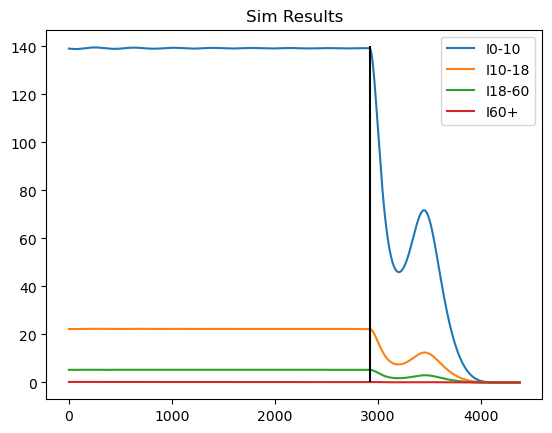

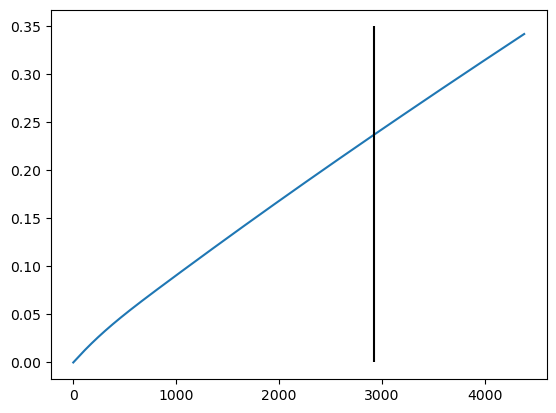

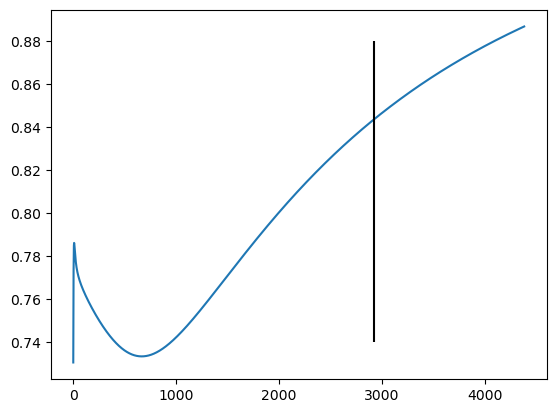

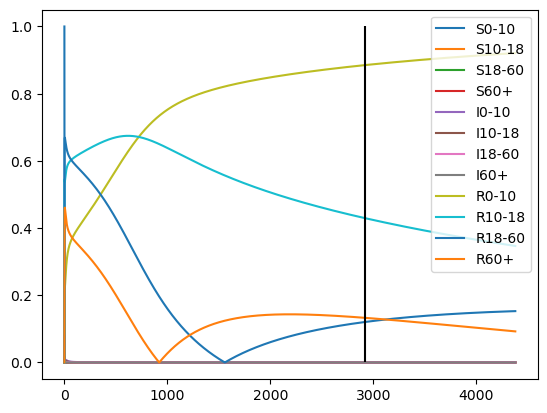

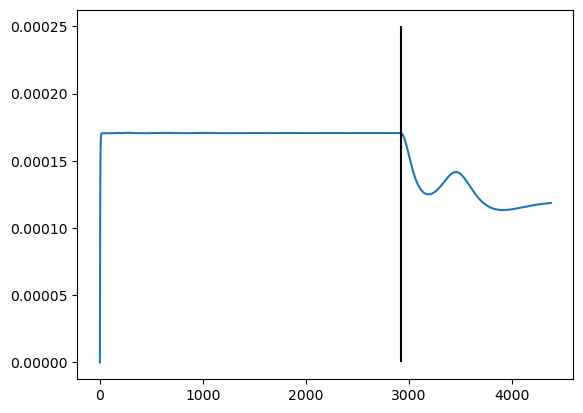

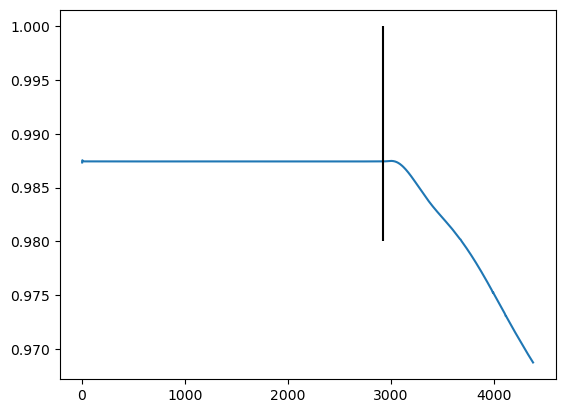

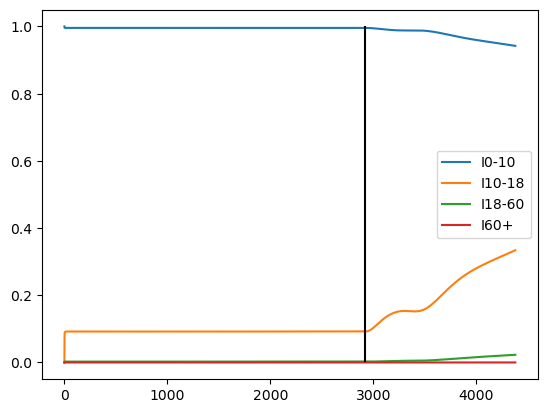

In [4]:
index_labels = ['S0-10','S10-18','S18-60','S60+','I0-10','I10-18','I18-60','I60+','R0-10','R10-18','R18-60','R60+']
for i in range(4,8):
    plt.plot(ts,res_test[:,i],label=index_labels[i])
    plt.legend()
    plt.title('Sim Results')
plt.vlines(8*365,0,140,'k')
plt.show()
plt.plot(ts,eigs_total)
plt.vlines(8*365,0,0.35,'k')
plt.show()
plt.plot(ts,eigs_total_var)
plt.vlines(8*365,0.74,0.88,'k')
plt.show()
for i in range(12):
    plt.plot(ts,np.abs(evec_total[:,i]),label=index_labels[i])
    plt.legend()
plt.vlines(8*365,0,1,'k')
plt.show()
plt.plot(ts,eigs_reduced)
plt.vlines(8*365,0,0.00025,'k')
plt.show()
plt.plot(ts,eigs_reduced_var)
plt.vlines(8*365,0.98,1,'k')
plt.show()
index_labels = ['I0-10','I10-18','I18-60','I60+']
for i in range(4):
    plt.plot(ts,np.abs(evec_reduced[:,i]),label=index_labels[i])
    plt.legend()
plt.vlines(8*365,0,1,'k')
plt.show()

In [5]:
# Set all parameters
Nt = 1e6
mu = [0,0,0,1/(22*365)]
sigma = 1/8
gamma = 1/5
beta = np.array([[1,2,2,4], [2,4,4,4],[4,4,4,4],[4,4,4,4]]).T
delta = np.array([0,1/(10*365),1/(8*365),1/(42*365)])
# Set initial conditions based on age distribution estimates
S0 = np.array([2.017e+04, 3.198e+03, 7.6e+02, 4.0e+01])
I0 = np.array([1.4e+02, 2.2e+01, 5e+00, 55e+00])
R0 = np.array([1.015e+05, 9.391e+04, 5.117e+05, 2.685e+05])
N0 = np.array([2.01850675e+04, 3.20685453e+03, 7.58724584e+02, 3.28414979e+01,
       1.39127817e+02, 2.22863565e+01, 5.27320520e+00, 2.28251528e-01,
       1.01671043e+05, 9.42796067e+04, 5.11299709e+05, 2.68399239e+05])
ICs = np.hstack((N0,np.zeros(int(12*13/2))))
# ICs = np.hstack((S0,I0,R0))
def betat(t):
    b0 = 1
    if (t // 365) >= 8:
        t_yr = t - 8*365
        if (b0 - 0.0005*t_yr) >0:
            b0 -= 0.0005*t_yr
        else:
            b0 = 0
    return b0 * np.array([[1,1,1,1], [1,1,1,1],[1,1,1,1],[1,1,1,1]]).T
ts = np.arange(12*365)
res_sde = {}
num_sims = 5
for i in range(num_sims):
    res_sde[i] = ito_sir_4(betat, gamma, mu, delta, N0, 4000, 0.1)

In [6]:
means = np.zeros((len(res_sde[0][0]),4))
i0s = np.array([res_sde[i][1][:,4] for i in range(num_sims)])
i1s = np.array([res_sde[i][1][:,5] for i in range(num_sims)])
i2s = np.array([res_sde[i][1][:,6] for i in range(num_sims)])
i3s = np.array([res_sde[i][1][:,7] for i in range(num_sims)])

In [7]:
means[:,0] = np.mean(i0s,axis=0)
means[:,1] = np.mean(i1s,axis=0)
means[:,2] = np.mean(i2s,axis=0)
means[:,3] = np.mean(i3s,axis=0)

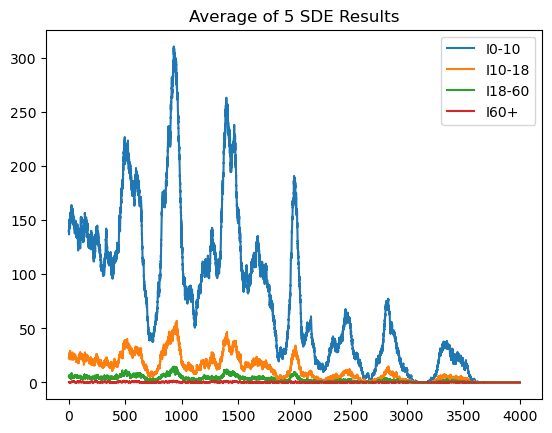

In [8]:
index_labels = ['I0-10','I10-18','I18-60','I60+']
for i in range(4):
    plt.plot(res_sde[0][0],means[:,i],label=index_labels[i])
    plt.legend()
plt.title(f'Average of {num_sims} SDE Results')
# plt.vlines(8*365,0.5,140,'k')
plt.show()

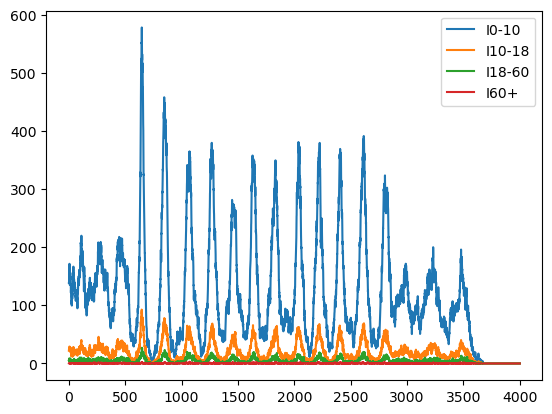

In [14]:
index_labels = ['I0-10','I10-18','I18-60','I60+']
plt.plot(res_sde[0][0],i0s[19,:],label=index_labels[0])
plt.plot(res_sde[0][0],i1s[19,:],label=index_labels[1])
plt.plot(res_sde[0][0],i2s[19,:],label=index_labels[2])
plt.plot(res_sde[0][0],i3s[19,:],label=index_labels[3])
plt.legend()
# plt.vlines(8*365,0.5,140,'k')
plt.show()

In [32]:
# Set all parameters
Nt = 1e6
mu = [0,0,0,1/(22*365)]
sigma = 1/8
gamma = 1/5
delta = np.array([0,1/(10*365),1/(8*365),1/(42*365)])
# Set initial conditions based on age distribution estimates
S0 = np.array([2.017e+04, 3.198e+03, 7.6e+02, 4.0e+01])
I0 = np.array([1.4e+02, 2.2e+01, 5e+00, 55e+00])
R0 = np.array([1.015e+05, 9.391e+04, 5.117e+05, 2.685e+05])
N0 = np.array([1.75828613e+04, 1.33980397e+03, 8.11698348e+01, 9.24702298e-01,
       1.41163259e+02, 2.16938083e+01, 2.27824968e+00, 2.62638041e-02,
       1.04260528e+05, 9.62205046e+04, 5.12021304e+05, 2.68327742e+05])
ICs = np.hstack((N0,np.zeros(int(12*13/2))))
# ICs = np.hstack((S0,I0,R0))
def betat(t):
    b0 = 1
    if (t // 365) >= 8:
        t_yr = t - 8*365
        if (b0 - 0.0005*t_yr) >0:
            b0 -= 0.0005*t_yr
        else:
            b0 = 0
    return b0 * np.array([[1,2,2,4], [2,4,4,4],[4,4,4,4],[4,4,4,4]]).T
ts = np.arange(12.5*365)
res_test = ig.odeint(sir_4_int,ICs,ts,args=((betat, gamma, mu, delta)))

In [33]:
eigs_total = np.zeros(len(res_test))
eigs_total_var = np.zeros(len(res_test))
evec_total = np.zeros((len(res_test),12))
for i in range(len(res_test)):
    eigenvalues, eigenvectors = np.linalg.eigh(symmetric_matrix(res_test[i,12:]))
    dominant_index = np.argmax(eigenvalues)
    dominant_eigenvalue = eigenvalues[dominant_index]
    dominant_eigenvector = eigenvectors[:, dominant_index]
    eigs_total[i] = eigenvalues[dominant_index]
    eigs_total_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
    evec_total[i, :] = eigenvectors[:, dominant_index].flatten()
eigs_reduced = np.zeros(len(res_test))
eigs_reduced_var = np.zeros(len(res_test))
evec_reduced = np.zeros((len(res_test),4))
for i in range(len(res_test)):
    eigenvalues, eigenvectors = np.linalg.eigh(symmetric_matrix(res_test[i,12:])[4:8,4:8])
    dominant_index = np.argmax(eigenvalues)
    dominant_eigenvalue = eigenvalues[dominant_index]
    dominant_eigenvector = eigenvectors[:, dominant_index]
    eigs_reduced[i] = eigenvalues[dominant_index]
    eigs_reduced_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
    evec_reduced[i, :] = eigenvectors[:, dominant_index].flatten()

/tmp/ipykernel_1722661/3595298485.py:10: RuntimeWarning: invalid value encountered in scalar divide
  eigs_total_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)
/tmp/ipykernel_1722661/3595298485.py:21: RuntimeWarning: invalid value encountered in scalar divide
  eigs_reduced_var[i] = eigenvalues[dominant_index]/np.linalg.norm(eigenvalues)


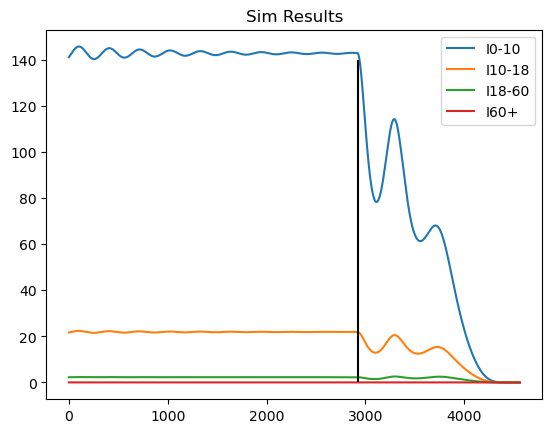

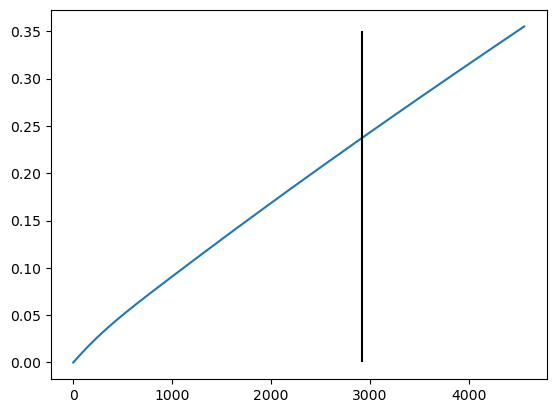

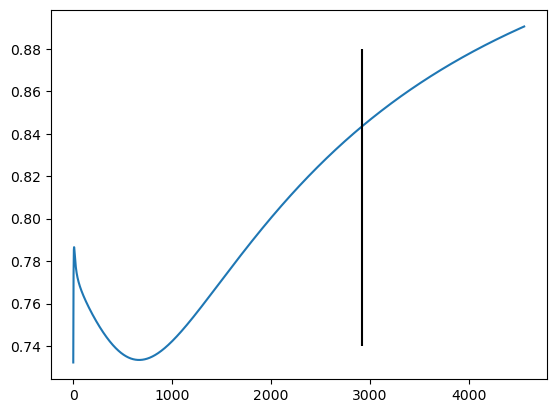

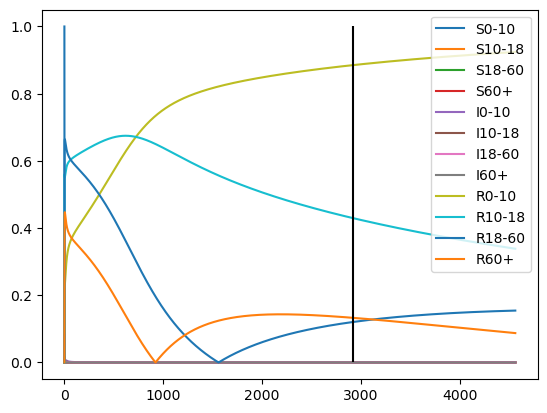

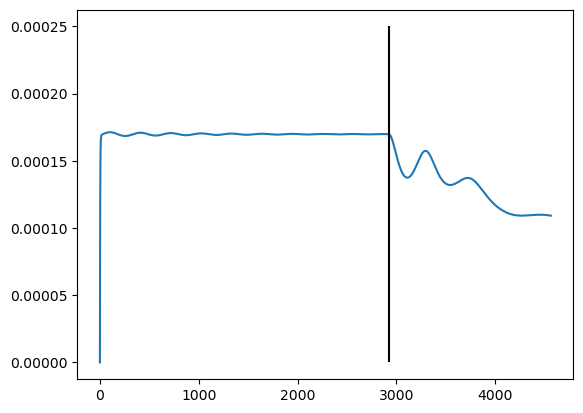

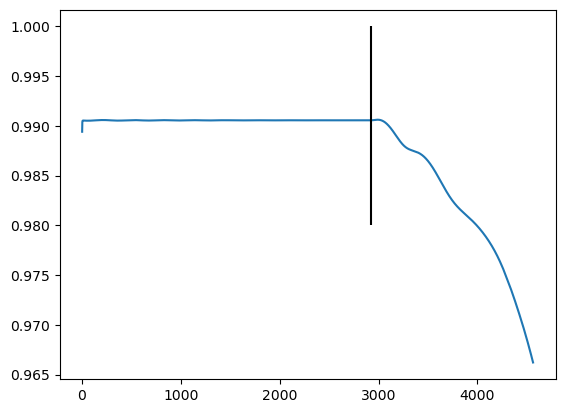

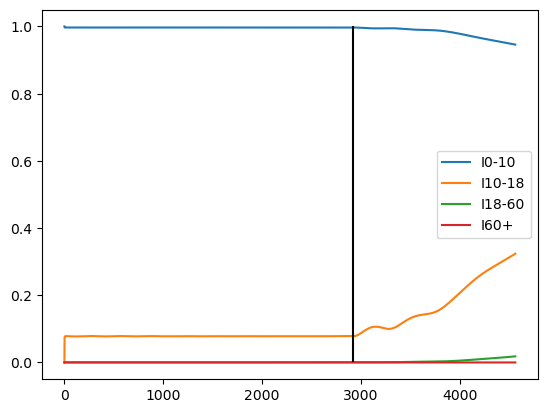

In [34]:
index_labels = ['S0-10','S10-18','S18-60','S60+','I0-10','I10-18','I18-60','I60+','R0-10','R10-18','R18-60','R60+']
for i in range(4,8):
    plt.plot(ts,res_test[:,i],label=index_labels[i])
    plt.legend()
    plt.title('Sim Results')
plt.vlines(8*365,0,140,'k')
plt.show()
plt.plot(ts,eigs_total)
plt.vlines(8*365,0,0.35,'k')
plt.show()
plt.plot(ts,eigs_total_var)
plt.vlines(8*365,0.74,0.88,'k')
plt.show()
for i in range(12):
    plt.plot(ts,np.abs(evec_total[:,i]),label=index_labels[i])
    plt.legend()
plt.vlines(8*365,0,1,'k')
plt.show()
plt.plot(ts,eigs_reduced)
plt.vlines(8*365,0,0.00025,'k')
plt.show()
plt.plot(ts,eigs_reduced_var)
plt.vlines(8*365,0.98,1,'k')
plt.show()
index_labels = ['I0-10','I10-18','I18-60','I60+']
for i in range(4):
    plt.plot(ts,np.abs(evec_reduced[:,i]),label=index_labels[i])
    plt.legend()
plt.vlines(8*365,0,1,'k')
plt.show()